# Dados de telefonia móvel - Anos 2009 a 2018

Análise dos dados de tecnologia de 2009 a 2018 (responsável: Risla Miranda)

## Orientações para rodar este caderno:

<ul>
    <li>É necessário um tratamento na tabela de tecnologias de 2009 a 2018, conforme células seguintes</li>
    <li>A tabela foi dividida em um dataframe para cada ano</li>
    <li>Antes de rodar as análises das tecnologias, uma coluna chamada media_ano foi adicionada a cada dataframe de ano</li>
    <li>No final, para cada dataframe de análise será adicionada uma coluna de ano. Isso foi uma decisão para melhor trabalhar nos painéis de visualização dos dados das análises</li>
</ul>

In [43]:
#importar as bibliotecas que serão 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#após análise do arquivo de tecnologia de 2005 a jan/2009, observou-se que as duas planilhas não possuem o mesmo shape e nem as mesmas colunas
#para dinamizar a análise e evitar ruído nos dados, decidimos não dar o merge para acrescentar a coluna de jan/2009 para a análise de tecnologia, portanto, as análises feitas aqui serão a partir de fev/2009 até dez/2018

In [4]:
#importar o arquivo com as tecnologias por mês de fev/2009 a 2018 em um dataframe
df_fev2009_2018_tec = pd.read_csv('./data/Acessos_Telefonia_Movel_200902-2018_Tecnologia_Colunas.csv', sep=';')

In [5]:
df_fev2009_2018_tec.head()

,CNPJ,Código Nacional,UF,Tecnologia,Tecnologia Geração,Empresa,Porte da Prestadora,Grupo Econômico,2009-02,2009-03,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,40432544000147,11,SP,Dados,2G,CLARO,Grande Porte,TELECOM AMERICAS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40432544000147,11,SP,Dados > 256kbps,3G,CLARO,Grande Porte,TELECOM AMERICAS,NaN,146326.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40432544000147,11,SP,Dados até 256kbps,2G,CLARO,Grande Porte,TELECOM AMERICAS,157408.0,20719.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40432544000147,11,SP,Dados Banda Larga,3G,CLARO,Grande Porte,TELECOM AMERICAS,NaN,NaN,...,310659.0,307150.0,304434.0,299957.0,298277.0,295243.0,296820.0,295957.0,295539.0,292765.0
4,40432544000147,11,SP,GSM,2G,CLARO,Grande Porte,TELECOM AMERICAS,6090030.0,6077569.0,...,133574.0,120767.0,108000.0,103727.0,101157.0,101811.0,103618.0,98130.0,93625.0,84598.0


In [6]:
df_fev2009_2018_tec.columns

Index(['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração',
       'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2009-02',
       '2009-03',
       ...
       '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
       '2018-09', '2018-10', '2018-11', '2018-12'],
      dtype='object', length=127)

In [7]:
df_fev2009_2018_tec['UF'].nunique()

27

In [8]:
df_fev2009_2018_tec[['Empresa','Grupo Econômico']].value_counts()

Empresa                         Grupo Econômico             
TIM                             TELECOM ITALIA                  1085
OI                              OI                               862
CLARO                           TELECOM AMERICAS                 724
VIVO                            TELEFÔNICA                       516
                                OUTROS                           444
OI                              OUTROS                           258
NEXTEL                          NEXTEL                           175
SURF TELECOM SA                 OUTROS                           131
ALGAR (CTBC TELECOM)            ALGAR (CTBC TELECOM)              86
TIM                             OUTROS                            66
PORTO SEGURO                    PORTO SEGURO                      40
DATORA                          DATORA                            34
PREFEITURA DE LONDRINA/COPEL    PREFEITURA DE LONDRINA/COPEL      14
TERAPAR TELECOMUNICAÇÕES LTDA   OUTROS    

In [9]:
df_fev2009_2018_tec[['Tecnologia', 'Tecnologia Geração']].value_counts()

Tecnologia         Tecnologia Geração
GSM                2G                    598
LTE                4G                    587
WCDMA              3G                    568
Dados Banda Larga  3G                    516
M2M                M2M                   398
M2M Padrão         M2M                   397
M2M Especial       M2M                   376
Dados > 256kbps    3G                    284
Dados              2G                    277
Dados até 256kbps  2G                    260
CDMA IS 95         2G                     69
TDMA               2G                     69
CDMA2000           2G                     53
AMPS               1G                     27
Name: count, dtype: int64

In [10]:
df_fev2009_2018_tec.isna().sum()

CNPJ                     0
Código Nacional          0
UF                       0
Tecnologia               0
Tecnologia Geração       0
                      ... 
2018-08               2707
2018-09               2695
2018-10               2696
2018-11               2621
2018-12               2557
Length: 127, dtype: int64

In [11]:
#alterar os NaN para zero, conforme decisão metodológico para cálculo da média do ano
df_fev2009_2018_tec = df_fev2009_2018_tec.fillna(0)

In [12]:
#checar se todos os NaN foram alterados para zero
df_fev2009_2018_tec.isna().sum().sum()

0

In [13]:
#verificar as colunas dos dataframes para dividi-los por ano
df_fev2009_2018_tec.columns.values

array(['CNPJ', 'Código Nacional', 'UF', 'Tecnologia',
       'Tecnologia Geração', 'Empresa', 'Porte da Prestadora',
       'Grupo Econômico', '2009-02', '2009-03', '2009-04', '2009-05',
       '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11',
       '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
       '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11',
       '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05',
       '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11',
       '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05',
       '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11',
       '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05',
       '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
       '20

In [14]:
df_2009_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2009-02','2009-03', '2009-04', '2009-05', 
        '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12']]

df_2010_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05',
       '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12']]

df_2011_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']]

df_2012_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05',
       '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12']]

df_2013_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05',
       '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12']]

df_2014_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05',
       '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12']]

df_2015_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
       '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12']]

df_2016_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12']]

df_2017_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
       '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12']]

df_2018_tec = df_fev2009_2018_tec[['CNPJ', 'Código Nacional', 'UF', 'Tecnologia', 'Tecnologia Geração', 'Empresa', 'Porte da Prestadora', 'Grupo Econômico', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12']]

In [15]:
df_2018_tec.head()

,CNPJ,Código Nacional,UF,Tecnologia,Tecnologia Geração,Empresa,Porte da Prestadora,Grupo Econômico,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,40432544000147,11,SP,Dados,2G,CLARO,Grande Porte,TELECOM AMERICAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40432544000147,11,SP,Dados > 256kbps,3G,CLARO,Grande Porte,TELECOM AMERICAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40432544000147,11,SP,Dados até 256kbps,2G,CLARO,Grande Porte,TELECOM AMERICAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40432544000147,11,SP,Dados Banda Larga,3G,CLARO,Grande Porte,TELECOM AMERICAS,316865.0,314908.0,310659.0,307150.0,304434.0,299957.0,298277.0,295243.0,296820.0,295957.0,295539.0,292765.0
4,40432544000147,11,SP,GSM,2G,CLARO,Grande Porte,TELECOM AMERICAS,158371.0,145651.0,133574.0,120767.0,108000.0,103727.0,101157.0,101811.0,103618.0,98130.0,93625.0,84598.0


In [16]:
#criar lista dos dfs para posterior iteração
lista_dfs_tec = [df_2009_tec, df_2010_tec, df_2011_tec, df_2012_tec, df_2013_tec, df_2014_tec, df_2015_tec, df_2016_tec, df_2017_tec, df_2018_tec] 

In [ ]:
df_2009_tec['media_ano'] = round(df_2009_tec[['2009-02','2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12']].mean(axis=1), 2)
df_2010_tec['media_ano'] = round(df_2010_tec[['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12']].mean(axis=1), 2)
df_2011_tec['media_ano'] = round(df_2011_tec[['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']].mean(axis=1), 2)
df_2012_tec['media_ano'] = round(df_2012_tec[['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12']].mean(axis=1), 2)
df_2013_tec['media_ano'] = round(df_2013_tec[['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12']].mean(axis=1), 2)
df_2014_tec['media_ano'] = round(df_2014_tec[['2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12']].mean(axis=1), 2)
df_2015_tec['media_ano'] = round(df_2015_tec[['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12']].mean(axis=1), 2)
df_2016_tec['media_ano'] = round(df_2016_tec[['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12']].mean(axis=1), 2)
df_2017_tec['media_ano'] = round(df_2017_tec[['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12']].mean(axis=1), 2)
df_2018_tec['media_ano'] = round(df_2018_tec[['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12']].mean(axis=1), 2)

In [18]:
df_2009_tec

,CNPJ,Código Nacional,UF,Tecnologia,Tecnologia Geração,Empresa,Porte da Prestadora,Grupo Econômico,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,media_ano
0,40432544000147,11,SP,Dados,2G,CLARO,Grande Porte,TELECOM AMERICAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,40432544000147,11,SP,Dados > 256kbps,3G,CLARO,Grande Porte,TELECOM AMERICAS,0.0,146326.0,152170.0,156664.0,165691.0,173292.0,179907.0,182800.0,187236.0,196205.0,193861.0,157650.18
2,40432544000147,11,SP,Dados até 256kbps,2G,CLARO,Grande Porte,TELECOM AMERICAS,157408.0,20719.0,24613.0,27446.0,22521.0,24615.0,24863.0,24772.0,22121.0,20050.0,28584.0,36155.64
3,40432544000147,11,SP,Dados Banda Larga,3G,CLARO,Grande Porte,TELECOM AMERICAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,40432544000147,11,SP,GSM,2G,CLARO,Grande Porte,TELECOM AMERICAS,6090030.0,6077569.0,6100921.0,6085715.0,6076262.0,6101774.0,6166601.0,6172843.0,6190731.0,6181884.0,6254192.0,6136229.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4474,2320739000106,38,MG,Dados > 256kbps,3G,VIVO,Grande Porte,OUTROS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4475,2320739000106,38,MG,Dados até 256kbps,2G,VIVO,Grande Porte,OUTROS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4476,2320739000106,38,MG,GSM,2G,VIVO,Grande Porte,OUTROS,529815.0,544118.0,561920.0,580076.0,601071.0,633609.0,664530.0,695129.0,729084.0,752570.0,787503.0,643584.09
4477,2320739000106,38,MG,TDMA,2G,VIVO,Grande Porte,OUTROS,71480.0,67568.0,64331.0,59938.0,55497.0,53010.0,51504.0,50085.0,48852.0,47425.0,46185.0,55988.64


# Tecnologias de 2009 a 2018

As tecnologias de geração que aparecem de 2009 a 2018 são 1G, 2G, 4G e M2M. Para entender melhor as tecnologias ligadas às primeiras gerações, seguem alguns conceitos retirados da <a href='https://www.gta.ufrj.br/grad/10_1/movel/evolucao.html'> página sobre Tecnologias de Rede em Telefonia da UFRJ </a>:

1. PRIMEIRA GERAÇÃO (1G)

         A primeira geração de telefonia móvel era analógica (só transmitia voz) e utilizava a comutação por circuito (canal dedicado). Fazia uso da tecnologia FDMA (Frequency Division Multiple Access), tendo como padrão o AMPS (Advanced Mobile Phone System).

    1.1 AMPS

         O AMPS foi desenvolvido em 1979 nos Estados Unidos. Foi o principal sistema analógico utilizado no mundo, sendo adotado no Brasil em 1991. Utiliza o FDMA, onde a banda é dividida em radio freqüências (modulação FM), e exige na transmissão um par de canais, para transmitir e receber. Trabalha na faixa de 800MHz e já contava com handoff e roaming. 

2. SEGUNDA GERAÇÃO (2G)

         Com o sistema analógico chegando ao seu limite de capacidade, veio a necessidade de sistemas digitais. Dentre as vantagens sobre os analógicos destacam-se: a codificação digital de voz mais poderosa, maior eficiência espectral, melhor qualidade de voz, facilidade de comunicação de dados e a criptografia. O sinal passa a ser digital, mas a tecnologia de rede ainda é a comutação de circuitos, assim como na Primeira Geração. A primeira tecnologia 2G implantada o Brasil foi o TDMA, logo em seguida o CDMA, que evoluiu para o GSM. 
         
         [...]
         
    2.2 CDMA

         Diferente das tecnologias utilizadas até então, o CDMA (Code Division Multiple Access) defendia a técnica de espalhamento espectral (spread spectrum), na qual, para um determinado canal, seria usada toda a largura de banda disponível (1,23MHz), muitas vezes maior do que necessária, a princípio, para a transmissão de um único sinal.

         A vantagem é que uma vez que diversos assinantes podem utilizar exatamente a mesma banda e simultaneamente, a diferenciação entre cada assinante no sistema CDMA é feita por códigos especiais associados a cada transmissão, do móvel para a Estação Base e da Estação Base para o móvel. Cada ligação em andamento possui um código específico, não ocorrendo o uso do mesmo código para ligações diferentes e permitindo a separação eficiente entre todas as chamadas que estão utilizando a mesma banda. A capacidade máxima alcançada depende, entre outros fatores, principalmente do controle de potência de cada chamada e dos sinais interferentes. Quanto menor a potência, maior é a capacidade (número de chamadas simultâneas) do sistema.

         Essa tecnologia opera nas freqüências de 800 e 1900 MHz e compete diretamente com a GSM.

    2.3 GSM

         Tecnologia que foi desenvolvida na Europa e adotada em boa parte do mundo, seu diferencial é o uso de cartões de memória SIM (Subscriber Identity Module) nos aparelhos, o que possibilita mobilidade terminal, ou seja, levar as características do assinante para outro aparelho ou rede GSM.

         Opera nas faixas de 850, 900, 1800 e 1900 MHz e utiliza uma combinação das técnicas de acesso FDMA e TDMA onde uma portadora de Rádio Frequência do GSM (ARFCN) possui largura de banda de 200kHz que, por meio da técnica TDMA, é subdividida em oito intervalos de tempo. Dessa forma, até 8 conversações simultâneas compartilham uma única portadora ou canal de 2 x 200kHz.

         Diversos serviços foram disponibilizados com a tecnologia GSM. Dentre eles: SMS para mensagens de texto, GPRS para transmissão de pacotes de dados, encaminhamento de chamadas, bloqueio de chamadas recebidas ou efetuadas, configuração sobre o ar (OAT – over the air, isto é, configuração remota do aparelho), broadcast de célula, localização do terminal, AoC (Advice of Charge) para controle pelo usuário do custo das chamadas, chamada em espera, teleconferência, restrição da identificação da chamada, CUGs (Closed User Groups ) e ECT (Explicit Call Transfer).

         No Brasil é a tecnologia líder de mercado, responsável por mais de 100 milhões de acessos e ainda em expansão. 
         
         [...]
         
     3.3 CDMA-2000 1X

         É a evolução do cdmaOne, muitos o consideram como tecnologia de 2,75G ou 3G, segundo o padrão da ITU-T, por possuir taxas de transmissão superiores a 144 Kbps. De qualquer forma, o CDMA2000 1X abriu mercado para as altas taxas de velocidade de dados hoje disponíveis em todo o mundo e que oferecem aos consumidores e profissionais total conectividade sem fio. Sua velocidade teórica é de 153,6 Kbps.

         A nomenclatura CDMA contida na sigla diz respeito apenas à técnica de modulação usada na interface aérea de sistemas celulares e não quer dizer que sejam totalmente compatíveis entre si.

         Na maioria dos casos, os sistemas 2,5G são implementados diretamente sobre as redes 2G existentes. Como resultado, um sistema 2,5G não é uma rede comutada a pacotes “pura”. Na verdade, pacotes de dados são transmitidos sobre redes de circuitos comutados. Redes wireless comutadas puras a pacotes só serão mesmo disponibilizadas com o advento da geração 3G.      

<space>

<space>

<space>

## Ano 2009

In [107]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2009_top5_empresas = df_2009_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2009_top5_empresas

Empresa
VIVO                    47826583.01
CLARO                   41360620.78
TIM                     38352422.87
OI                      33863581.86
ALGAR (CTBC TELECOM)      494189.35
Name: media_ano, dtype: float64

In [110]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2009 = df_2009_top5_empresas.index.tolist()
top5_empresas_2009

['VIVO', 'CLARO', 'TIM', 'OI', 'ALGAR (CTBC TELECOM)']

### Estudando essas tecnologias

In [20]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2009_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [167]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2009_tec_tipo = pd.DataFrame(df_2009_tec.groupby('Tecnologia')['media_ano'].sum())
df_2009_tec_tipo['percentual'] = ((df_2009_tec_tipo['media_ano'] / df_2009_tec_tipo['media_ano'].sum())) * 100
df_2009_tec_tipo['ano'] = 2009
df_2009_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,5.740450e+03,0.003543,2009
CDMA IS 95,9.678606e+06,5.974201,2009
CDMA2000,1.940451e+05,0.119776,2009
Dados,0.000000e+00,0.000000,2009
Dados > 256kbps,2.079988e+06,1.283890,2009
Dados Banda Larga,0.000000e+00,0.000000,2009
Dados até 256kbps,1.675319e+06,1.034105,2009
GSM,1.455152e+08,89.820449,2009
LTE,0.000000e+00,0.000000,2009


In [276]:
#df_2009_tec_tipo.to_csv("tec_2009_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [89]:
#compreender a frequência das tecnologias geração no dataframe
df_2009_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [168]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2009_tec_ger = pd.DataFrame(df_2009_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2009_tec_ger['percentual'] = ((df_2009_tec_ger['media_ano'] / df_2009_tec_ger['media_ano'].sum())) * 100
df_2009_tec_ger['ano'] = 2009
df_2009_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,5.740450e+03,0.003543,2009
2G,1.576323e+08,97.299837,2009
3G,4.368704e+06,2.696619,2009
4G,0.000000e+00,0.000000,2009
M2M,0.000000e+00,0.000000,2009


In [277]:
#df_2009_tec_ger.to_csv("tec_2009_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='porcentagem'>

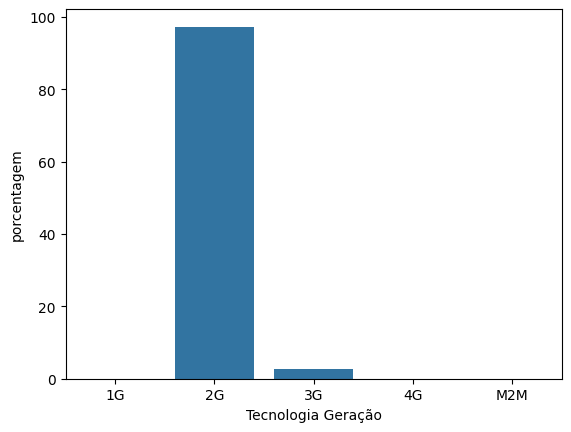

In [85]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2009_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [123]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2009 = pd.DataFrame(df_2009_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2009 = tec_empresa_2009.drop(index=[0]) 
tec_empresa_2009['percentual'] = round((tec_empresa_2009['media_ano'] / tec_empresa_2009.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2009

media_ano  percentual
Empresa                        Tecnologia Geração                         
ALGAR (CTBC TELECOM)           1G                       287.55        0.06
                               2G                    470501.26       95.21
                               3G                     23400.54        4.74
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
CLARO                          2G                  40205584.00       97.21
                               3G                   1155036.78        2.79
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
DATORA                         2G                         0.00         NaN
                               3G                         0.00         NaN
                               M2M                        0.00         NaN
J. SAFRA TELECOMUNICACOES LTDA M2M                        0.00         NaN
NEXTEL                         3G                         0.00         NaN
                               4G                         0.00         NaN
OI                             2G                  33179130.50       97.98
                               3G                    684451.36        2.02
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
PORTO SEGURO                   2G                         0.00         NaN
                               M2M                        0.00         NaN
PREFEITURA DE LONDRINA/COPEL   1G                        10.45        0.01
                               2G                     88788.54       98.91
                               3G                       965.00        1.08
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
SURF TELECOM SA                2G                         0.00         NaN
                               4G                         0.00         NaN
                               M2M                        0.00         NaN
TERAPAR TELECOMUNICAÇÕES LTDA  3G                         0.00         NaN
                               M2M                        0.00         NaN
TIM                            1G                      5442.45        0.01
                               2G                  37648560.10       98.16
                               3G                    698420.32        1.82
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
UNICEL                         2G                     19547.73      100.00
VIVO                           2G                  46020152.58       96.22
                               3G                   1806430.43        3.78
                               4G                         0.00        0.00
                               M2M                        0.00        0.00

In [169]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2009_top5 = tec_empresa_2009.loc[top5_empresas_2009]
tec_empresa_2009_top5['ano'] = 2009
tec_empresa_2009_top5

media_ano  percentual   ano
Empresa              Tecnologia Geração                               
VIVO                 2G                  46020152.58       96.22  2009
                     3G                   1806430.43        3.78  2009
                     4G                         0.00        0.00  2009
                     M2M                        0.00        0.00  2009
CLARO                2G                  40205584.00       97.21  2009
                     3G                   1155036.78        2.79  2009
                     4G                         0.00        0.00  2009
                     M2M                        0.00        0.00  2009
TIM                  1G                      5442.45        0.01  2009
                     2G                  37648560.10       98.16  2009
                     3G                    698420.32        1.82  2009
                     4G                         0.00        0.00  2009
                     M2M                        0.00        0.00  2009
OI                   2G                  33179130.50       97.98  2009
                     3G                    684451.36        2.02  2009
                     4G                         0.00        0.00  2009
                     M2M                        0.00        0.00  2009
ALGAR (CTBC TELECOM) 1G                       287.55        0.06  2009
                     2G                    470501.26       95.21  2009
                     3G                     23400.54        4.74  2009
                     4G                         0.00        0.00  2009
                     M2M                        0.00        0.00  2009

### Análise da presença de cada tecnologia geração por estado

In [311]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2009_tec_uf = pd.DataFrame(df_2009_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2009_tec_uf['percentual'] = round(((df_2009_tec_uf['media_ano'] / df_2009_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2009_tec_uf['ano'] = 2009
df_2009_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                             
AC 2G                  483132.80      0.9619  2009
   3G                   19157.01      0.0381  2009
   4G                       0.00      0.0000  2009
   M2M                      0.00      0.0000  2009
AL 1G                      63.91      0.0000  2009
...                          ...         ...   ...
SP M2M                      0.00      0.0000  2009
TO 2G                  901672.28      0.9704  2009
   3G                   27530.55      0.0296  2009
   4G                       0.00      0.0000  2009
   M2M                      0.00      0.0000  2009

[121 rows x 3 columns]

In [326]:
df_2009_tec_uf_reset = df_2009_tec_uf.reset_index()
df_2009_tec_uf_reset

,UF,Tecnologia Geração,media_ano,percentual,ano
0,AC,2G,483132.80,0.9619,2009
1,AC,3G,19157.01,0.0381,2009
2,AC,4G,0.00,0.0000,2009
3,AC,M2M,0.00,0.0000,2009
4,AL,1G,63.91,0.0000,2009
...,...,...,...,...,...
116,SP,M2M,0.00,0.0000,2009
117,TO,2G,901672.28,0.9704,2009
118,TO,3G,27530.55,0.0296,2009
119,TO,4G,0.00,0.0000,2009


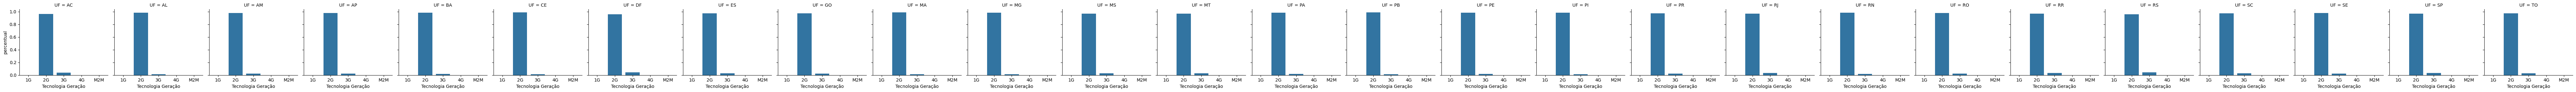

In [328]:
g = sns.FacetGrid(df_2009_tec_uf_reset, col="UF")
g.map(sns.barplot, 'Tecnologia Geração', "percentual", order=["1G", "2G", "3G", "4G", "M2M"])

<space>

<space>

## Ano 2010

In [127]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2010_top5_empresas = df_2010_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2010_top5_empresas

Empresa
VIVO                    56202494.30
CLARO                   47616368.65
TIM                     45236514.06
OI                      37263277.20
ALGAR (CTBC TELECOM)      576172.26
Name: media_ano, dtype: float64

In [128]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2010 = df_2010_top5_empresas.index.tolist()
top5_empresas_2010

['VIVO', 'CLARO', 'TIM', 'OI', 'ALGAR (CTBC TELECOM)']

### Estudando essas tecnologias

In [130]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2010_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [171]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2010_tec_tipo = pd.DataFrame(df_2010_tec.groupby('Tecnologia')['media_ano'].sum())
df_2010_tec_tipo['percentual'] = ((df_2010_tec_tipo['media_ano'] / df_2010_tec_tipo['media_ano'].sum())) * 100
df_2010_tec_tipo['ano'] = 2010
df_2010_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,7.636700e+02,0.000408,2010
CDMA IS 95,5.742809e+06,3.071116,2010
CDMA2000,0.000000e+00,0.000000,2010
Dados,0.000000e+00,0.000000,2010
Dados > 256kbps,3.680082e+06,1.968019,2010
Dados Banda Larga,0.000000e+00,0.000000,2010
Dados até 256kbps,1.719715e+06,0.919662,2010
GSM,1.649106e+08,88.190233,2010
LTE,0.000000e+00,0.000000,2010


In [279]:
#df_2010_tec_tipo.to_csv("tec_2010_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [132]:
#compreender a frequência das tecnologias geração no dataframe
df_2010_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [172]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2010_tec_ger = pd.DataFrame(df_2010_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2010_tec_ger['percentual'] = ((df_2010_tec_ger['media_ano'] / df_2010_tec_ger['media_ano'].sum())) * 100
df_2010_tec_ger['ano'] = 2010
df_2010_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,7.636700e+02,0.000408,2010
2G,1.725275e+08,92.263549,2010
3G,1.446595e+07,7.736042,2010
4G,0.000000e+00,0.000000,2010
M2M,0.000000e+00,0.000000,2010


In [280]:
#df_2010_tec_ger.to_csv("tec_2010_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='porcentagem'>

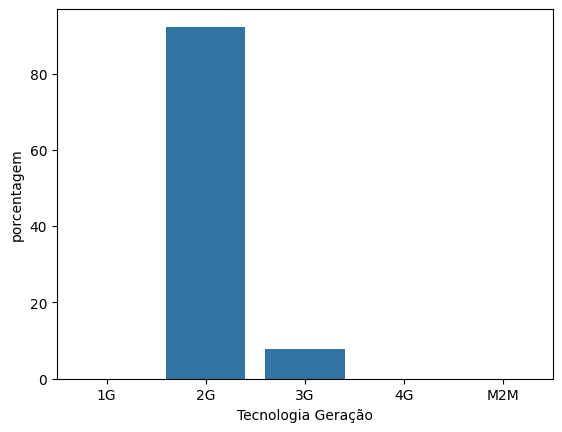

In [137]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2010_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [139]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2010 = pd.DataFrame(df_2010_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2010 = tec_empresa_2010.drop(index=[0]) 
tec_empresa_2010['percentual'] = round((tec_empresa_2010['media_ano'] / tec_empresa_2010.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2010

media_ano  percentual
Empresa                        Tecnologia Geração                         
ALGAR (CTBC TELECOM)           1G                        45.50        0.01
                               2G                    539024.43       93.55
                               3G                     37102.33        6.44
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
CLARO                          2G                  41361415.56       86.86
                               3G                   6254953.09       13.14
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
DATORA                         2G                         0.00         NaN
                               3G                         0.00         NaN
                               M2M                        0.00         NaN
J. SAFRA TELECOMUNICACOES LTDA M2M                        0.00         NaN
NEXTEL                         3G                         0.00         NaN
                               4G                         0.00         NaN
OI                             2G                  36189483.37       97.12
                               3G                   1073793.83        2.88
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
PORTO SEGURO                   2G                         0.00         NaN
                               M2M                        0.00         NaN
PREFEITURA DE LONDRINA/COPEL   1G                         3.75        0.00
                               2G                     78715.58       99.42
                               3G                       458.17        0.58
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
SURF TELECOM SA                2G                         0.00         NaN
                               4G                         0.00         NaN
                               M2M                        0.00         NaN
TERAPAR TELECOMUNICAÇÕES LTDA  3G                         0.00         NaN
                               M2M                        0.00         NaN
TIM                            1G                       714.42        0.00
                               2G                  42836511.82       94.69
                               3G                   2399287.82        5.30
                               4G                         0.00        0.00
                               M2M                        0.00        0.00
UNICEL                         2G                     20190.25      100.00
VIVO                           2G                  51502139.33       91.64
                               3G                   4700354.97        8.36
                               4G                         0.00        0.00
                               M2M                        0.00        0.00

In [173]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2010_top5 = tec_empresa_2010.loc[top5_empresas_2010]
tec_empresa_2010_top5['ano'] = 2010
tec_empresa_2010_top5

media_ano  percentual   ano
Empresa              Tecnologia Geração                               
VIVO                 2G                  51502139.33       91.64  2010
                     3G                   4700354.97        8.36  2010
                     4G                         0.00        0.00  2010
                     M2M                        0.00        0.00  2010
CLARO                2G                  41361415.56       86.86  2010
                     3G                   6254953.09       13.14  2010
                     4G                         0.00        0.00  2010
                     M2M                        0.00        0.00  2010
TIM                  1G                       714.42        0.00  2010
                     2G                  42836511.82       94.69  2010
                     3G                   2399287.82        5.30  2010
                     4G                         0.00        0.00  2010
                     M2M                        0.00        0.00  2010
OI                   2G                  36189483.37       97.12  2010
                     3G                   1073793.83        2.88  2010
                     4G                         0.00        0.00  2010
                     M2M                        0.00        0.00  2010
ALGAR (CTBC TELECOM) 1G                        45.50        0.01  2010
                     2G                    539024.43       93.55  2010
                     3G                     37102.33        6.44  2010
                     4G                         0.00        0.00  2010
                     M2M                        0.00        0.00  2010

### Análise da presença de cada tecnologia geração por estado

In [181]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2010_tec_uf = pd.DataFrame(df_2010_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2010_tec_uf['percentual'] = round(((df_2010_tec_uf['media_ano'] / df_2010_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2010_tec_uf['ano'] = 2010
df_2010_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                              
AC 2G                   538398.01      0.9118  2010
   3G                    52051.23      0.0882  2010
   4G                        0.00      0.0000  2010
   M2M                       0.00      0.0000  2010
AL 1G                        0.00      0.0000  2010
...                           ...         ...   ...
SP M2M                       0.00      0.0000  2010
TO 2G                  1077680.33      0.9218  2010
   3G                    91412.67      0.0782  2010
   4G                        0.00      0.0000  2010
   M2M                       0.00      0.0000  2010

[121 rows x 3 columns]

<space>

<space>

## Ano 2011

In [144]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2011_top5_empresas = df_2011_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2011_top5_empresas

Empresa
VIVO                    65222544.08
TIM                     56719996.53
CLARO                   55939882.30
OI                      42204560.94
ALGAR (CTBC TELECOM)      648103.57
Name: media_ano, dtype: float64

In [145]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2011 = df_2011_top5_empresas.index.tolist()
top5_empresas_2011

['VIVO', 'TIM', 'CLARO', 'OI', 'ALGAR (CTBC TELECOM)']

### Estudando essas tecnologias

In [147]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2011_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [174]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2011_tec_tipo = pd.DataFrame(df_2011_tec.groupby('Tecnologia')['media_ano'].sum())
df_2011_tec_tipo['percentual'] = ((df_2011_tec_tipo['media_ano'] / df_2011_tec_tipo['media_ano'].sum())) * 100
df_2011_tec_tipo['ano'] = 2011
df_2011_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,0.000000e+00,0.000000,2011
CDMA IS 95,2.616285e+06,1.184807,2011
CDMA2000,0.000000e+00,0.000000,2011
Dados,0.000000e+00,0.000000,2011
Dados > 256kbps,4.856575e+06,2.199342,2011
Dados Banda Larga,0.000000e+00,0.000000,2011
Dados até 256kbps,2.003606e+06,0.907350,2011
GSM,1.878761e+08,85.081339,2011
LTE,0.000000e+00,0.000000,2011


In [281]:
#df_2011_tec_tipo.to_csv("tec_2011_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [152]:
#compreender a frequência das tecnologias geração no dataframe
df_2011_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [175]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2011_tec_ger = pd.DataFrame(df_2011_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2011_tec_ger['percentual'] = ((df_2011_tec_ger['media_ano'] / df_2011_tec_ger['media_ano'].sum())) * 100
df_2011_tec_ger['ano'] = 2011
df_2011_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,0.000000e+00,0.000000,2011
2G,1.924990e+08,87.174838,2011
3G,2.832045e+07,12.825162,2011
4G,0.000000e+00,0.000000,2011
M2M,0.000000e+00,0.000000,2011


In [282]:
#df_2011_tec_ger.to_csv("tec_2011_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='porcentagem'>

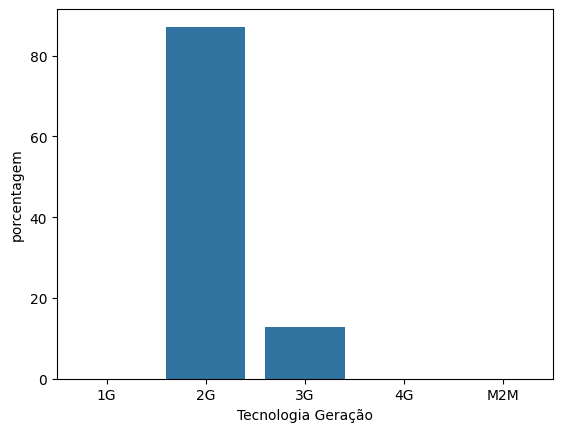

In [154]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2011_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [178]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2011 = pd.DataFrame(df_2011_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2011 = tec_empresa_2011.drop(index=[0]) 
tec_empresa_2011['percentual'] = round((tec_empresa_2011['media_ano'] / tec_empresa_2011.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2011['ano'] = 2011
tec_empresa_2011

media_ano  percentual  \
Empresa                        Tecnologia Geração                            
ALGAR (CTBC TELECOM)           1G                         0.00        0.00   
                               2G                    603521.91       93.12   
                               3G                     44581.66        6.88   
                               4G                         0.00        0.00   
                               M2M                        0.00        0.00   
CLARO                          2G                  44776920.86       80.04   
                               3G                  11162961.44       19.96   
                               4G                         0.00        0.00   
                               M2M                        0.00        0.00   
DATORA                         2G                         0.00         NaN   
                               3G                         0.00         NaN   
                               M2M                        0.00         NaN   
J. SAFRA TELECOMUNICACOES LTDA M2M                        0.00         NaN   
NEXTEL                         3G                         0.00         NaN   
                               4G                         0.00         NaN   
OI                             2G                  40865531.08       96.83   
                               3G                   1339029.86        3.17   
                               4G                         0.00        0.00   
                               M2M                        0.00        0.00   
PORTO SEGURO                   2G                         0.00         NaN   
                               M2M                        0.00         NaN   
PREFEITURA DE LONDRINA/COPEL   1G                         0.00        0.00   
                               2G                     75961.83       96.51   
                               3G                      2750.41        3.49   
                               4G                         0.00        0.00   
                               M2M                        0.00        0.00   
SURF TELECOM SA                2G                         0.00         NaN   
                               4G                         0.00         NaN   
                               M2M                        0.00         NaN   
TERAPAR TELECOMUNICAÇÕES LTDA  3G                         0.00         NaN   
                               M2M                        0.00         NaN   
TIM                            1G                         0.00        0.00   
                               2G                  50767029.80       89.50   
                               3G                   5952966.73       10.50   
                               4G                         0.00        0.00   
                               M2M                        0.00        0.00   
UNICEL                         2G                      5625.58      100.00   
VIVO                           2G                  55404384.67       84.95   
                               3G                   9818159.41       15.05   
                               4G                         0.00        0.00   
                               M2M                        0.00        0.00   

                                                    ano  
Empresa                        Tecnologia Geração        
ALGAR (CTBC TELECOM)           1G                  2011  
                               2G                  2011  
                               3G                  2011  
                               4G                  2011  
                               M2M                 2011  
CLARO                          2G                  2011  
                               3G                  2011  
                               4G                  2011  
                               M2M                 2011  
DATORA                         2G                  2011  
  

In [179]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2011_top5 = tec_empresa_2011.loc[top5_empresas_2011]
tec_empresa_2011_top5['ano'] = 2011
tec_empresa_2011_top5

media_ano  percentual   ano
Empresa              Tecnologia Geração                               
VIVO                 2G                  55404384.67       84.95  2011
                     3G                   9818159.41       15.05  2011
                     4G                         0.00        0.00  2011
                     M2M                        0.00        0.00  2011
TIM                  1G                         0.00        0.00  2011
                     2G                  50767029.80       89.50  2011
                     3G                   5952966.73       10.50  2011
                     4G                         0.00        0.00  2011
                     M2M                        0.00        0.00  2011
CLARO                2G                  44776920.86       80.04  2011
                     3G                  11162961.44       19.96  2011
                     4G                         0.00        0.00  2011
                     M2M                        0.00        0.00  2011
OI                   2G                  40865531.08       96.83  2011
                     3G                   1339029.86        3.17  2011
                     4G                         0.00        0.00  2011
                     M2M                        0.00        0.00  2011
ALGAR (CTBC TELECOM) 1G                         0.00        0.00  2011
                     2G                    603521.91       93.12  2011
                     3G                     44581.66        6.88  2011
                     4G                         0.00        0.00  2011
                     M2M                        0.00        0.00  2011

### Análise da presença de cada tecnologia geração por estado

In [182]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2011_tec_uf = pd.DataFrame(df_2010_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2011_tec_uf['percentual'] = round(((df_2010_tec_uf['media_ano'] / df_2010_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2011_tec_uf['ano'] = 2011
df_2011_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                              
AC 2G                   538398.01      0.9118  2011
   3G                    52051.23      0.0882  2011
   4G                        0.00      0.0000  2011
   M2M                       0.00      0.0000  2011
AL 1G                        0.00      0.0000  2011
...                           ...         ...   ...
SP M2M                       0.00      0.0000  2011
TO 2G                  1077680.33      0.9218  2011
   3G                    91412.67      0.0782  2011
   4G                        0.00      0.0000  2011
   M2M                       0.00      0.0000  2011

[121 rows x 3 columns]

<space>

<space>

## Ano 2012

In [183]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2012_top5_empresas = df_2012_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2012_top5_empresas

Empresa
VIVO                    75498277.96
TIM                     68380404.58
CLARO                   62855974.34
OI                      47640116.70
ALGAR (CTBC TELECOM)      717730.99
Name: media_ano, dtype: float64

In [184]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2012 = df_2012_top5_empresas.index.tolist()
top5_empresas_2012

['VIVO', 'TIM', 'CLARO', 'OI', 'ALGAR (CTBC TELECOM)']

### Estudando essas tecnologias

In [185]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2012_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [186]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2012_tec_tipo = pd.DataFrame(df_2012_tec.groupby('Tecnologia')['media_ano'].sum())
df_2012_tec_tipo['percentual'] = ((df_2012_tec_tipo['media_ano'] / df_2012_tec_tipo['media_ano'].sum())) * 100
df_2012_tec_tipo['ano'] = 2012
df_2012_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,0.000000e+00,0.000000,2012
CDMA IS 95,9.554188e+05,0.374425,2012
CDMA2000,0.000000e+00,0.000000,2012
Dados,1.648470e+06,0.646028,2012
Dados > 256kbps,1.413474e+06,0.553934,2012
Dados Banda Larga,3.758142e+06,1.472800,2012
Dados até 256kbps,6.582776e+05,0.257976,2012
GSM,1.958485e+08,76.752227,2012
LTE,0.000000e+00,0.000000,2012


In [283]:
#df_2012_tec_tipo.to_csv("tec_2012_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [198]:
#compreender a frequência das tecnologias geração no dataframe
df_2012_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [189]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2012_tec_ger = pd.DataFrame(df_2012_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2012_tec_ger['percentual'] = ((df_2012_tec_ger['media_ano'] / df_2012_tec_ger['media_ano'].sum())) * 100
df_2012_tec_ger['ano'] = 2012
df_2012_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,0.000000e+00,0.000000,2012
2G,1.991107e+08,78.030657,2012
3G,5.234101e+07,20.512226,2012
4G,0.000000e+00,0.000000,2012
M2M,3.718125e+06,1.457118,2012


In [284]:
#df_2012_tec_ger.to_csv("tec_2012_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='percentual'>

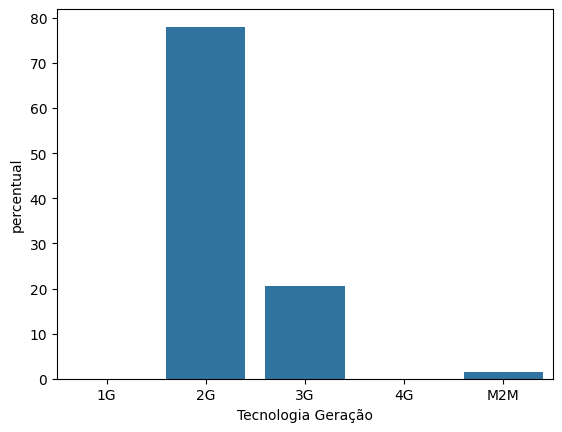

In [201]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2012_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [203]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2012 = pd.DataFrame(df_2012_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2012 = tec_empresa_2012.drop(index=[0]) 
tec_empresa_2012['percentual'] = round((tec_empresa_2012['media_ano'] / tec_empresa_2012.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2012['ano'] = 2012
tec_empresa_2012

media_ano  percentual  \
Empresa                        Tecnologia Geração                            
ALGAR (CTBC TELECOM)           1G                         0.00        0.00   
                               2G                    420909.65       58.64   
                               3G                    274978.99       38.31   
                               4G                         0.00        0.00   
                               M2M                    21842.35        3.04   
CLARO                          2G                  43414682.52       69.07   
                               3G                  17713858.55       28.18   
                               4G                         0.00        0.00   
                               M2M                  1727433.27        2.75   
DATORA                         2G                         0.00         NaN   
                               3G                         0.00         NaN   
                               M2M                        0.00         NaN   
J. SAFRA TELECOMUNICACOES LTDA M2M                        0.00         NaN   
NEXTEL                         3G                         3.00      100.00   
                               4G                         0.00        0.00   
OI                             2G                  42625839.11       89.47   
                               3G                   4447795.57        9.34   
                               4G                         0.00        0.00   
                               M2M                   566482.02        1.19   
PORTO SEGURO                   2G                       100.00        2.78   
                               M2M                     3500.00       97.22   
PREFEITURA DE LONDRINA/COPEL   1G                         0.00        0.00   
                               2G                     65805.75       89.24   
                               3G                      7930.84       10.76   
                               4G                         0.00        0.00   
                               M2M                        0.00        0.00   
SURF TELECOM SA                2G                         0.00         NaN   
                               4G                         0.00         NaN   
                               M2M                        0.00         NaN   
TERAPAR TELECOMUNICAÇÕES LTDA  3G                         0.00         NaN   
                               M2M                        0.00         NaN   
TIM                            1G                         0.00        0.00   
                               2G                  53215512.20       77.82   
                               3G                  14371253.77       21.02   
                               4G                         0.00        0.00   
                               M2M                   793638.61        1.16   
UNICEL                         2G                         0.00         NaN   
VIVO                           2G                  59367855.41       78.63   
                               3G                  15525193.81       20.56   
                               4G                         0.00        0.00   
                               M2M                   605228.74        0.80   

                                                    ano  
Empresa                        Tecnologia Geração        
ALGAR (CTBC TELECOM)           1G                  2012  
                               2G                  2012  
                               3G                  2012  
                               4G                  2012  
                               M2M                 2012  
CLARO                          2G                  2012  
                               3G                  2012  
                               4G                  2012  
                               M2M                 2012  
DATORA                         2G                  2012  
  

In [204]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2012_top5 = tec_empresa_2012.loc[top5_empresas_2011]
tec_empresa_2012_top5['ano'] = 2012
tec_empresa_2012_top5

media_ano  percentual   ano
Empresa              Tecnologia Geração                               
VIVO                 2G                  59367855.41       78.63  2012
                     3G                  15525193.81       20.56  2012
                     4G                         0.00        0.00  2012
                     M2M                   605228.74        0.80  2012
TIM                  1G                         0.00        0.00  2012
                     2G                  53215512.20       77.82  2012
                     3G                  14371253.77       21.02  2012
                     4G                         0.00        0.00  2012
                     M2M                   793638.61        1.16  2012
CLARO                2G                  43414682.52       69.07  2012
                     3G                  17713858.55       28.18  2012
                     4G                         0.00        0.00  2012
                     M2M                  1727433.27        2.75  2012
OI                   2G                  42625839.11       89.47  2012
                     3G                   4447795.57        9.34  2012
                     4G                         0.00        0.00  2012
                     M2M                   566482.02        1.19  2012
ALGAR (CTBC TELECOM) 1G                         0.00        0.00  2012
                     2G                    420909.65       58.64  2012
                     3G                    274978.99       38.31  2012
                     4G                         0.00        0.00  2012
                     M2M                    21842.35        3.04  2012

### Análise da presença de cada tecnologia geração por estado

In [205]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2012_tec_uf = pd.DataFrame(df_2012_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2012_tec_uf['percentual'] = round(((df_2012_tec_uf['media_ano'] / df_2012_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2012_tec_uf['ano'] = 2012
df_2012_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                              
AC 2G                   737491.35      0.8107  2012
   3G                   171794.24      0.1888  2012
   4G                        0.00      0.0000  2012
   M2M                     412.25      0.0005  2012
AL 1G                        0.00      0.0000  2012
...                           ...         ...   ...
SP M2M                 1983303.50      0.0318  2012
TO 2G                  1465737.17      0.8320  2012
   3G                   291951.67      0.1657  2012
   4G                        0.00      0.0000  2012
   M2M                    4019.34      0.0023  2012

[121 rows x 3 columns]

<space>

<space>

## Ano 2013

In [206]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2013_top5_empresas = df_2013_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2013_top5_empresas

Empresa
VIVO                    76563643.18
TIM                     72192773.39
CLARO                   66925199.10
OI                      49829343.47
ALGAR (CTBC TELECOM)      905999.52
Name: media_ano, dtype: float64

In [207]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2013 = df_2013_top5_empresas.index.tolist()
top5_empresas_2013

['VIVO', 'TIM', 'CLARO', 'OI', 'ALGAR (CTBC TELECOM)']

### Estudando essas tecnologias

In [208]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2013_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [209]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2013_tec_tipo = pd.DataFrame(df_2013_tec.groupby('Tecnologia')['media_ano'].sum())
df_2013_tec_tipo['percentual'] = ((df_2013_tec_tipo['media_ano'] / df_2013_tec_tipo['media_ano'].sum())) * 100
df_2013_tec_tipo['ano'] = 2013
df_2013_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,0.000000e+00,0.000000,2013
CDMA IS 95,6.251740e+04,0.023441,2013
CDMA2000,0.000000e+00,0.000000,2013
Dados,0.000000e+00,0.000000,2013
Dados > 256kbps,0.000000e+00,0.000000,2013
Dados Banda Larga,6.988921e+06,2.620500,2013
Dados até 256kbps,0.000000e+00,0.000000,2013
GSM,1.786196e+08,66.973519,2013
LTE,3.762216e+05,0.141065,2013


In [285]:
#df_2013_tec_tipo.to_csv("tec_2013_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [210]:
#compreender a frequência das tecnologias geração no dataframe
df_2013_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [211]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2013_tec_ger = pd.DataFrame(df_2013_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2013_tec_ger['percentual'] = ((df_2013_tec_ger['media_ano'] / df_2013_tec_ger['media_ano'].sum())) * 100
df_2013_tec_ger['ano'] = 2013
df_2013_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,0.000000e+00,0.000000,2013
2G,1.786821e+08,66.996960,2013
3G,7.994401e+07,29.975056,2013
4G,3.762216e+05,0.141065,2013
M2M,7.699464e+06,2.886919,2013


In [287]:
#df_2013_tec_ger.to_csv("tec_2013_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='percentual'>

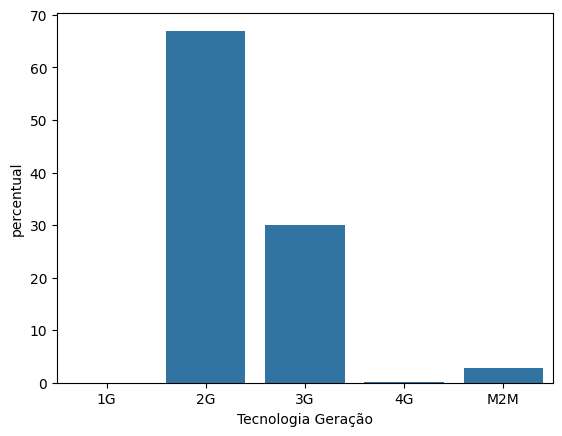

In [212]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2013_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [ ]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2013 = pd.DataFrame(df_2013_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2013 = tec_empresa_2013.drop(index=[0]) 
tec_empresa_2013['percentual'] = round((tec_empresa_2013['media_ano'] / tec_empresa_2013.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2013['ano'] = 2013
tec_empresa_2013

In [215]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2013_top5 = tec_empresa_2013.loc[top5_empresas_2013]
tec_empresa_2013_top5['ano'] = 2013
tec_empresa_2013_top5

media_ano  percentual   ano
Empresa              Tecnologia Geração                               
VIVO                 2G                  54054872.12       70.60  2013
                     3G                  20516878.90       26.80  2013
                     4G                    156786.30        0.20  2013
                     M2M                  1835105.86        2.40  2013
TIM                  1G                         0.00        0.00  2013
                     2G                  52157395.37       72.25  2013
                     3G                  18716316.08       25.93  2013
                     4G                    107631.52        0.15  2013
                     M2M                  1211430.42        1.68  2013
CLARO                2G                  32178425.31       48.08  2013
                     3G                  31182008.74       46.59  2013
                     4G                     71468.30        0.11  2013
                     M2M                  3493296.75        5.22  2013
OI                   2G                  39921356.73       80.12  2013
                     3G                   8830241.32       17.72  2013
                     4G                     40288.02        0.08  2013
                     M2M                  1037457.40        2.08  2013
ALGAR (CTBC TELECOM) 1G                         0.00        0.00  2013
                     2G                    306687.25       33.85  2013
                     3G                    543786.09       60.02  2013
                     4G                         0.00        0.00  2013
                     M2M                    55526.18        6.13  2013

### Análise da presença de cada tecnologia geração por estado

In [229]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2013_tec_uf = pd.DataFrame(df_2013_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2013_tec_uf['percentual'] = round(((df_2013_tec_uf['media_ano'] / df_2013_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2013_tec_uf['ano'] = 2013
df_2013_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                              
AC 2G                   657718.92      0.7066  2013
   3G                   271720.34      0.2919  2013
   4G                     1154.09      0.0012  2013
   M2M                     223.41      0.0002  2013
AL 1G                        0.00      0.0000  2013
...                           ...         ...   ...
SP M2M                 4226114.91      0.0656  2013
TO 2G                  1363360.83      0.7317  2013
   3G                   489735.24      0.2629  2013
   4G                     1282.25      0.0007  2013
   M2M                    8786.91      0.0047  2013

[121 rows x 3 columns]

<space>

<space>

## Ano 2014

In [217]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2014_top5_empresas = df_2014_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2014_top5_empresas

Empresa
VIVO                    79202339.51
TIM                     74479604.13
CLARO                   69358320.07
OI                      50960105.96
ALGAR (CTBC TELECOM)     1108244.42
Name: media_ano, dtype: float64

In [218]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2014 = df_2014_top5_empresas.index.tolist()
top5_empresas_2014

['VIVO', 'TIM', 'CLARO', 'OI', 'ALGAR (CTBC TELECOM)']

### Estudando essas tecnologias

In [220]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2014_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [221]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2014_tec_tipo = pd.DataFrame(df_2014_tec.groupby('Tecnologia')['media_ano'].sum())
df_2014_tec_tipo['percentual'] = ((df_2014_tec_tipo['media_ano'] / df_2014_tec_tipo['media_ano'].sum())) * 100
df_2014_tec_tipo['ano'] = 2014
df_2014_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,0.000000e+00,0.000000,2014
CDMA IS 95,1.446511e+04,0.005235,2014
CDMA2000,0.000000e+00,0.000000,2014
Dados,0.000000e+00,0.000000,2014
Dados > 256kbps,0.000000e+00,0.000000,2014
Dados Banda Larga,6.742696e+06,2.440045,2014
Dados até 256kbps,0.000000e+00,0.000000,2014
GSM,1.360184e+08,49.222291,2014
LTE,3.687450e+06,1.334413,2014


In [288]:
#df_2014_tec_tipo.to_csv("tec_2014_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [222]:
#compreender a frequência das tecnologias geração no dataframe
df_2014_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [223]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2014_tec_ger = pd.DataFrame(df_2014_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2014_tec_ger['percentual'] = ((df_2014_tec_ger['media_ano'] / df_2014_tec_ger['media_ano'].sum())) * 100
df_2014_tec_ger['ano'] = 2014
df_2014_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,0.000000e+00,0.000000,2014
2G,1.360328e+08,49.227526,2014
3G,1.274600e+08,46.125196,2014
4G,3.687450e+06,1.334413,2014
M2M,9.154604e+06,3.312865,2014


In [289]:
#df_2014_tec_ger.to_csv("tec_2014_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='percentual'>

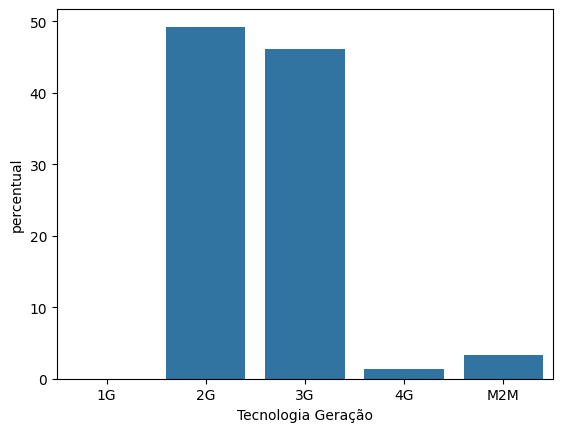

In [224]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2014_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [227]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2014 = pd.DataFrame(df_2014_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2014 = tec_empresa_2014.drop(index=[0]) 
tec_empresa_2014['percentual'] = round((tec_empresa_2014['media_ano'] / tec_empresa_2014.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2014['ano'] = 2014
tec_empresa_2014

media_ano  percentual  \
Empresa                        Tecnologia Geração                            
ALGAR (CTBC TELECOM)           1G                         0.00        0.00   
                               2G                    244006.92       22.02   
                               3G                    852624.33       76.93   
                               4G                         0.00        0.00   
                               M2M                    11613.17        1.05   
CLARO                          2G                  20366576.69       29.36   
                               3G                  44480786.84       64.13   
                               4G                    732983.79        1.06   
                               M2M                  3777972.75        5.45   
DATORA                         2G                         0.00         NaN   
                               3G                         0.00         NaN   
                               M2M                        0.00         NaN   
J. SAFRA TELECOMUNICACOES LTDA M2M                        0.00         NaN   
NEXTEL                         3G                    959859.50       94.29   
                               4G                     58179.00        5.71   
OI                             2G                  32947538.43       64.65   
                               3G                  16667918.65       32.71   
                               4G                    347458.28        0.68   
                               M2M                   997190.60        1.96   
PORTO SEGURO                   2G                     11210.68        7.26   
                               M2M                   143129.42       92.74   
PREFEITURA DE LONDRINA/COPEL   1G                         0.00        0.00   
                               2G                     15187.25       28.59   
                               3G                     36857.92       69.39   
                               4G                        74.25        0.14   
                               M2M                      999.67        1.88   
SURF TELECOM SA                2G                         0.00         NaN   
                               4G                         0.00         NaN   
                               M2M                        0.00         NaN   
TERAPAR TELECOMUNICAÇÕES LTDA  3G                       158.33       19.65   
                               M2M                      647.50       80.35   
TIM                            1G                         0.00        0.00   
                               2G                  40712039.60       54.66   
                               3G                  31402946.75       42.16   
                               4G                   1116223.68        1.50   
                               M2M                  1248394.10        1.68   
UNICEL                         2G                         0.00         NaN   
VIVO                           2G                  41736282.93       52.70   
                               3G                  33058869.35       41.74   
                               4G                   1432530.87        1.81   
                               M2M                  2974656.36        3.76   

                                                    ano  
Empresa                        Tecnologia Geração        
ALGAR (CTBC TELECOM)           1G                  2014  
                               2G                  2014  
                               3G                  2014  
                               4G                  2014  
                               M2M                 2014  
CLARO                          2G                  2014  
                               3G                  2014  
                               4G                  2014  
                               M2M                 2014  
DATORA                         2G                  2014  
  

In [228]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2014_top5 = tec_empresa_2014.loc[top5_empresas_2014]
tec_empresa_2014_top5['ano'] = 2014
tec_empresa_2014_top5

media_ano  percentual   ano
Empresa              Tecnologia Geração                               
VIVO                 2G                  41736282.93       52.70  2014
                     3G                  33058869.35       41.74  2014
                     4G                   1432530.87        1.81  2014
                     M2M                  2974656.36        3.76  2014
TIM                  1G                         0.00        0.00  2014
                     2G                  40712039.60       54.66  2014
                     3G                  31402946.75       42.16  2014
                     4G                   1116223.68        1.50  2014
                     M2M                  1248394.10        1.68  2014
CLARO                2G                  20366576.69       29.36  2014
                     3G                  44480786.84       64.13  2014
                     4G                    732983.79        1.06  2014
                     M2M                  3777972.75        5.45  2014
OI                   2G                  32947538.43       64.65  2014
                     3G                  16667918.65       32.71  2014
                     4G                    347458.28        0.68  2014
                     M2M                   997190.60        1.96  2014
ALGAR (CTBC TELECOM) 1G                         0.00        0.00  2014
                     2G                    244006.92       22.02  2014
                     3G                    852624.33       76.93  2014
                     4G                         0.00        0.00  2014
                     M2M                    11613.17        1.05  2014

### Análise da presença de cada tecnologia geração por estado

In [230]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2014_tec_uf = pd.DataFrame(df_2014_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2014_tec_uf['percentual'] = round(((df_2014_tec_uf['media_ano'] / df_2014_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2014_tec_uf['ano'] = 2014
df_2014_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                              
AC 2G                   441256.51      0.4876  2014
   3G                   452167.84      0.4997  2014
   4G                    10848.17      0.0120  2014
   M2M                     610.49      0.0007  2014
AL 1G                        0.00      0.0000  2014
...                           ...         ...   ...
SP M2M                 5020715.28      0.0751  2014
TO 2G                  1127778.26      0.5726  2014
   3G                   814852.90      0.4138  2014
   4G                    14469.83      0.0073  2014
   M2M                   12301.58      0.0062  2014

[121 rows x 3 columns]

<space>

<space>

## Ano 2015

In [231]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2015_top5_empresas = df_2015_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2015_top5_empresas

Empresa
VIVO      80632886.90
TIM       73345484.68
CLARO     70402851.66
OI        49865356.11
NEXTEL     2111854.71
Name: media_ano, dtype: float64

In [232]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2015 = df_2015_top5_empresas.index.tolist()
top5_empresas_2015

['VIVO', 'TIM', 'CLARO', 'OI', 'NEXTEL']

### Estudando essas tecnologias

In [234]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2015_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [235]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2015_tec_tipo = pd.DataFrame(df_2015_tec.groupby('Tecnologia')['media_ano'].sum())
df_2015_tec_tipo['percentual'] = ((df_2015_tec_tipo['media_ano'] / df_2015_tec_tipo['media_ano'].sum())) * 100
df_2015_tec_tipo['ano'] = 2015
df_2015_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,0.000000e+00,0.000000,2015
CDMA IS 95,4.847830e+03,0.001744,2015
CDMA2000,0.000000e+00,0.000000,2015
Dados,0.000000e+00,0.000000,2015
Dados > 256kbps,0.000000e+00,0.000000,2015
Dados Banda Larga,6.140351e+06,2.208388,2015
Dados até 256kbps,0.000000e+00,0.000000,2015
GSM,8.876217e+07,31.923472,2015
LTE,1.490690e+07,5.361293,2015


In [290]:
#df_2015_tec_tipo.to_csv("tec_2015_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [236]:
#compreender a frequência das tecnologias geração no dataframe
df_2015_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [237]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2015_tec_ger = pd.DataFrame(df_2015_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2015_tec_ger['percentual'] = ((df_2015_tec_ger['media_ano'] / df_2015_tec_ger['media_ano'].sum())) * 100
df_2015_tec_ger['ano'] = 2015
df_2015_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,0.000000e+00,0.000000,2015
2G,8.876702e+07,31.925215,2015
3G,1.634607e+08,58.788921,2015
4G,1.490690e+07,5.361293,2015
M2M,1.091214e+07,3.924570,2015


In [291]:
#df_2015_tec_ger.to_csv("tec_2015_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='percentual'>

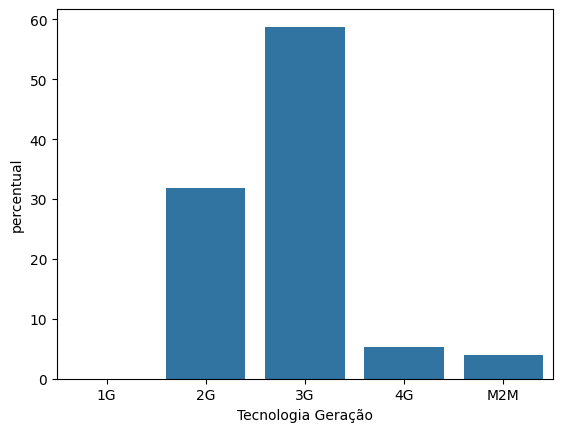

In [238]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2015_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [240]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2015 = pd.DataFrame(df_2015_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2015 = tec_empresa_2015.drop(index=[0]) 
tec_empresa_2015['percentual'] = round((tec_empresa_2015['media_ano'] / tec_empresa_2015.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2015['ano'] = 2015
tec_empresa_2015

media_ano  percentual  \
Empresa                        Tecnologia Geração                            
ALGAR (CTBC TELECOM)           1G                         0.00        0.00   
                               2G                    195238.42       15.40   
                               3G                   1061076.07       83.70   
                               4G                         0.00        0.00   
                               M2M                    11365.75        0.90   
CLARO                          2G                  10538292.59       14.97   
                               3G                  52971116.87       75.24   
                               4G                   2737410.42        3.89   
                               M2M                  4156031.78        5.90   
DATORA                         2G                      2490.00        7.10   
                               3G                      3950.00       11.26   
                               M2M                    28627.50       81.64   
J. SAFRA TELECOMUNICACOES LTDA M2M                        0.00         NaN   
NEXTEL                         3G                   1660054.38       78.61   
                               4G                    451800.33       21.39   
OI                             2G                  22800517.49       45.72   
                               3G                  24198349.00       48.53   
                               4G                   1741044.99        3.49   
                               M2M                  1125444.63        2.26   
PORTO SEGURO                   2G                     37740.91       11.80   
                               M2M                   282121.34       88.20   
PREFEITURA DE LONDRINA/COPEL   1G                         0.00        0.00   
                               2G                      1647.25        2.76   
                               3G                     56421.58       94.47   
                               4G                         0.00        0.00   
                               M2M                     1655.58        2.77   
SURF TELECOM SA                2G                         0.00         NaN   
                               4G                         0.00         NaN   
                               M2M                        0.00         NaN   
TERAPAR TELECOMUNICAÇÕES LTDA  3G                       380.00        6.36   
                               M2M                     5590.83       93.64   
TIM                            1G                         0.00        0.00   
                               2G                  27017008.66       36.84   
                               3G                  40637496.13       55.41   
                               4G                   4335003.21        5.91   
                               M2M                  1355976.68        1.85   
UNICEL                         2G                         0.00         NaN   
VIVO                           2G                  28174084.82       34.94   
                               3G                  42871834.07       53.17   
                               4G                   5641641.92        7.00   
                               M2M                  3945326.09        4.89   

                                                    ano  
Empresa                        Tecnologia Geração        
ALGAR (CTBC TELECOM)           1G                  2015  
                               2G                  2015  
                               3G                  2015  
                               4G                  2015  
                               M2M                 2015  
CLARO                          2G                  2015  
                               3G                  2015  
                               4G                  2015  
                               M2M                 2015  
DATORA                         2G                  2015  
  

In [241]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2015_top5 = tec_empresa_2015.loc[top5_empresas_2015]
tec_empresa_2015_top5['ano'] = 2015
tec_empresa_2015_top5

media_ano  percentual   ano
Empresa Tecnologia Geração                               
VIVO    2G                  28174084.82       34.94  2015
        3G                  42871834.07       53.17  2015
        4G                   5641641.92        7.00  2015
        M2M                  3945326.09        4.89  2015
TIM     1G                         0.00        0.00  2015
        2G                  27017008.66       36.84  2015
        3G                  40637496.13       55.41  2015
        4G                   4335003.21        5.91  2015
        M2M                  1355976.68        1.85  2015
CLARO   2G                  10538292.59       14.97  2015
        3G                  52971116.87       75.24  2015
        4G                   2737410.42        3.89  2015
        M2M                  4156031.78        5.90  2015
OI      2G                  22800517.49       45.72  2015
        3G                  24198349.00       48.53  2015
        4G                   1741044.99        3.49  2015
        M2M                  1125444.63        2.26  2015
NEXTEL  3G                   1660054.38       78.61  2015
        4G                    451800.33       21.39  2015

### Análise da presença de cada tecnologia geração por estado

In [242]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2015_tec_uf = pd.DataFrame(df_2015_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2015_tec_uf['percentual'] = round(((df_2015_tec_uf['media_ano'] / df_2015_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2015_tec_uf['ano'] = 2015
df_2015_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                              
AC 2G                   272958.42      0.2992  2015
   3G                   588631.50      0.6452  2015
   4G                    47603.66      0.0522  2015
   M2M                    3195.59      0.0035  2015
AL 1G                        0.00      0.0000  2015
...                           ...         ...   ...
SP M2M                 6131808.80      0.0900  2015
TO 2G                   797099.99      0.3973  2015
   3G                  1130142.58      0.5633  2015
   4G                    66224.99      0.0330  2015
   M2M                   12733.65      0.0063  2015

[121 rows x 3 columns]

<space>

<space>

## Ano 2016

In [243]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2016_top5_empresas = df_2016_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2016_top5_empresas

Empresa
VIVO      73404112.06
TIM       64778023.41
CLARO     63607610.78
OI        46683323.17
NEXTEL     2491973.98
Name: media_ano, dtype: float64

In [244]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2016 = df_2016_top5_empresas.index.tolist()
top5_empresas_2016

['VIVO', 'TIM', 'CLARO', 'OI', 'NEXTEL']

### Estudando essas tecnologias

In [245]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2016_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [246]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2016_tec_tipo = pd.DataFrame(df_2016_tec.groupby('Tecnologia')['media_ano'].sum())
df_2016_tec_tipo['percentual'] = ((df_2016_tec_tipo['media_ano'] / df_2016_tec_tipo['media_ano'].sum())) * 100
df_2016_tec_tipo['ano'] = 2016
df_2016_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,0.000000e+00,0.000000,2016
CDMA IS 95,1.328580e+03,0.000526,2016
CDMA2000,0.000000e+00,0.000000,2016
Dados,0.000000e+00,0.000000,2016
Dados > 256kbps,0.000000e+00,0.000000,2016
Dados Banda Larga,5.135775e+06,2.031395,2016
Dados até 256kbps,0.000000e+00,0.000000,2016
GSM,5.689983e+07,22.506049,2016
LTE,4.253408e+07,16.823850,2016


In [292]:
#df_2016_tec_tipo.to_csv("tec_2016_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [248]:
#compreender a frequência das tecnologias geração no dataframe
df_2016_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [249]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2016_tec_ger = pd.DataFrame(df_2016_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2016_tec_ger['percentual'] = ((df_2016_tec_ger['media_ano'] / df_2016_tec_ger['media_ano'].sum())) * 100
df_2016_tec_ger['ano'] = 2016
df_2016_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,0.000000e+00,0.000000,2016
2G,5.690116e+07,22.506575,2016
3G,1.414677e+08,55.955870,2016
4G,4.253408e+07,16.823850,2016
M2M,1.191720e+07,4.713706,2016


In [293]:
#df_2016_tec_ger.to_csv("tec_2016_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='percentual'>

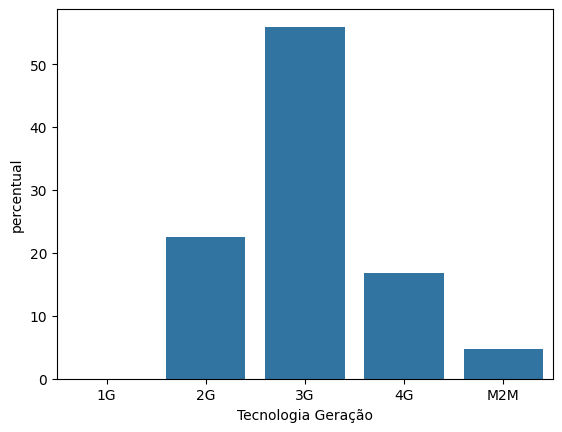

In [250]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2016_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [251]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2016 = pd.DataFrame(df_2016_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2016 = tec_empresa_2016.drop(index=[0]) 
tec_empresa_2016['percentual'] = round((tec_empresa_2016['media_ano'] / tec_empresa_2016.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2016['ano'] = 2016
tec_empresa_2016

media_ano  percentual  \
Empresa                        Tecnologia Geração                            
ALGAR (CTBC TELECOM)           1G                         0.00        0.00   
                               2G                    160877.74       12.14   
                               3G                   1145682.89       86.49   
                               4G                      4756.92        0.36   
                               M2M                    13367.92        1.01   
CLARO                          2G                   5864231.53        9.22   
                               3G                  45337601.96       71.28   
                               4G                   8102833.42       12.74   
                               M2M                  4302943.87        6.76   
DATORA                         2G                      2136.68        2.99   
                               3G                      3291.67        4.60   
                               M2M                    66146.57       92.42   
J. SAFRA TELECOMUNICACOES LTDA M2M                        0.00         NaN   
NEXTEL                         3G                   1516004.15       60.84   
                               4G                    975969.83       39.16   
OI                             2G                  15461943.00       33.12   
                               3G                  23647945.72       50.66   
                               4G                   6352853.65       13.61   
                               M2M                  1220580.80        2.61   
PORTO SEGURO                   2G                     91358.25       23.92   
                               M2M                   290612.41       76.08   
PREFEITURA DE LONDRINA/COPEL   1G                         0.00        0.00   
                               2G                      1303.08        1.87   
                               3G                     66783.92       95.82   
                               4G                         0.00        0.00   
                               M2M                     1608.67        2.31   
SURF TELECOM SA                2G                         0.00         NaN   
                               4G                         0.00         NaN   
                               M2M                        0.00         NaN   
TERAPAR TELECOMUNICAÇÕES LTDA  3G                       380.00        5.29   
                               M2M                     6800.00       94.71   
TIM                            1G                         0.00        0.00   
                               2G                  17263471.77       26.65   
                               3G                  34267324.03       52.90   
                               4G                  11858870.72       18.31   
                               M2M                  1388356.89        2.14   
UNICEL                         2G                         0.00         NaN   
VIVO                           2G                  18055834.36       24.60   
                               3G                  35482699.39       48.34   
                               4G                  15238797.40       20.76   
                               M2M                  4626780.91        6.30   

                                                    ano  
Empresa                        Tecnologia Geração        
ALGAR (CTBC TELECOM)           1G                  2016  
                               2G                  2016  
                               3G                  2016  
                               4G                  2016  
                               M2M                 2016  
CLARO                          2G                  2016  
                               3G                  2016  
                               4G                  2016  
                               M2M                 2016  
DATORA                         2G                  2016  
  

In [264]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2016_top5 = tec_empresa_2016.loc[top5_empresas_2016]
tec_empresa_2016_top5['ano'] = 2016
tec_empresa_2016_top5

media_ano  percentual   ano
Empresa Tecnologia Geração                               
VIVO    2G                  18055834.36       24.60  2016
        3G                  35482699.39       48.34  2016
        4G                  15238797.40       20.76  2016
        M2M                  4626780.91        6.30  2016
TIM     1G                         0.00        0.00  2016
        2G                  17263471.77       26.65  2016
        3G                  34267324.03       52.90  2016
        4G                  11858870.72       18.31  2016
        M2M                  1388356.89        2.14  2016
CLARO   2G                   5864231.53        9.22  2016
        3G                  45337601.96       71.28  2016
        4G                   8102833.42       12.74  2016
        M2M                  4302943.87        6.76  2016
OI      2G                  15461943.00       33.12  2016
        3G                  23647945.72       50.66  2016
        4G                   6352853.65       13.61  2016
        M2M                  1220580.80        2.61  2016
NEXTEL  3G                   1516004.15       60.84  2016
        4G                    975969.83       39.16  2016

### Análise da presença de cada tecnologia geração por estado

In [253]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2016_tec_uf = pd.DataFrame(df_2016_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2016_tec_uf['percentual'] = round(((df_2016_tec_uf['media_ano'] / df_2016_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2016_tec_uf['ano'] = 2016
df_2016_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                              
AC 2G                   184781.33      0.2304  2016
   3G                   462616.25      0.5769  2016
   4G                   150169.75      0.1873  2016
   M2M                    4352.75      0.0054  2016
AL 1G                        0.00      0.0000  2016
...                           ...         ...   ...
SP M2M                 6892889.49      0.1086  2016
TO 2G                   522797.25      0.2826  2016
   3G                  1077874.58      0.5826  2016
   4G                   238109.67      0.1287  2016
   M2M                   11291.74      0.0061  2016

[121 rows x 3 columns]

<space>

<space>

## Ano 2017

In [254]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2017_top5_empresas = df_2017_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2017_top5_empresas

Empresa
VIVO      74366472.98
TIM       60533529.86
CLARO     60215849.60
OI        41619074.62
NEXTEL     2620774.01
Name: media_ano, dtype: float64

In [255]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2017 = df_2017_top5_empresas.index.tolist()
top5_empresas_2017

['VIVO', 'TIM', 'CLARO', 'OI', 'NEXTEL']

### Estudando essas tecnologias

In [256]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2017_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [257]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2017_tec_tipo = pd.DataFrame(df_2017_tec.groupby('Tecnologia')['media_ano'].sum())
df_2017_tec_tipo['percentual'] = ((df_2017_tec_tipo['media_ano'] / df_2017_tec_tipo['media_ano'].sum())) * 100
df_2017_tec_tipo['ano'] = 2017
df_2017_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,0.000000e+00,0.000000,2017
CDMA IS 95,5.704100e+02,0.000236,2017
CDMA2000,0.000000e+00,0.000000,2017
Dados,0.000000e+00,0.000000,2017
Dados > 256kbps,0.000000e+00,0.000000,2017
Dados Banda Larga,3.707897e+06,1.535690,2017
Dados até 256kbps,0.000000e+00,0.000000,2017
GSM,3.942642e+07,16.329134,2017
LTE,8.303302e+07,34.389561,2017


In [294]:
#df_2017_tec_tipo.to_csv("tec_2017_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [258]:
#compreender a frequência das tecnologias geração no dataframe
df_2017_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [259]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2017_tec_ger = pd.DataFrame(df_2017_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2017_tec_ger['percentual'] = ((df_2017_tec_ger['media_ano'] / df_2017_tec_ger['media_ano'].sum())) * 100
df_2017_tec_ger['ano'] = 2017
df_2017_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,0.000000e+00,0.000000,2017
2G,3.942699e+07,16.329371,2017
3G,1.050149e+08,43.493745,2017
4G,8.303302e+07,34.389561,2017
M2M,1.397340e+07,5.787324,2017


In [295]:
#df_2017_tec_ger.to_csv("tec_2017_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='percentual'>

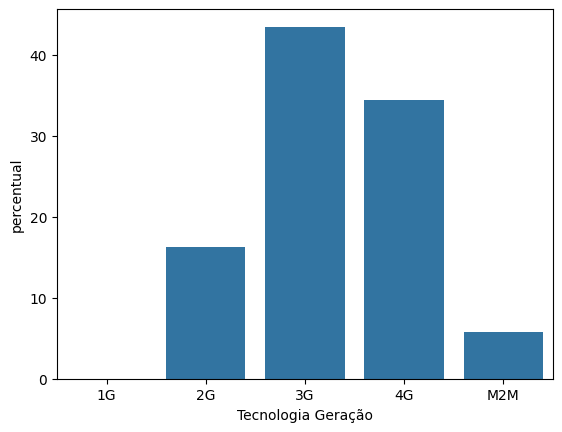

In [260]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2017_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [262]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2017 = pd.DataFrame(df_2017_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2017 = tec_empresa_2017.drop(index=[0]) 
tec_empresa_2017['percentual'] = round((tec_empresa_2017['media_ano'] / tec_empresa_2017.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2017['ano'] = 2017
tec_empresa_2017

media_ano  percentual  \
Empresa                        Tecnologia Geração                            
ALGAR (CTBC TELECOM)           1G                         0.00        0.00   
                               2G                    128823.83        9.68   
                               3G                   1082688.25       81.35   
                               4G                    106233.33        7.98   
                               M2M                    13151.83        0.99   
CLARO                          2G                   3537784.25        5.88   
                               3G                  33834916.98       56.19   
                               4G                  18040932.61       29.96   
                               M2M                  4802215.76        7.98   
DATORA                         2G                      2490.00        1.61   
                               3G                      3950.00        2.56   
                               M2M                   148005.75       95.83   
J. SAFRA TELECOMUNICACOES LTDA M2M                        0.00         NaN   
NEXTEL                         3G                   1540136.01       58.77   
                               4G                   1080638.00       41.23   
OI                             2G                   9877598.27       23.73   
                               3G                  17599693.15       42.29   
                               4G                  12777822.47       30.70   
                               M2M                  1363960.73        3.28   
PORTO SEGURO                   2G                    137268.75       26.03   
                               M2M                   390001.42       73.97   
PREFEITURA DE LONDRINA/COPEL   1G                         0.00        0.00   
                               2G                      1065.08        1.51   
                               3G                     68716.83       97.28   
                               4G                         0.00        0.00   
                               M2M                      852.67        1.21   
SURF TELECOM SA                2G                      8191.74      100.00   
                               4G                         0.00        0.00   
                               M2M                        0.00        0.00   
TERAPAR TELECOMUNICAÇÕES LTDA  3G                        63.33        5.29   
                               M2M                     1133.33       94.71   
TIM                            1G                         0.00        0.00   
                               2G                  12050418.26       19.91   
                               3G                  24193707.66       39.97   
                               4G                  22687319.76       37.48   
                               M2M                  1602084.18        2.65   
UNICEL                         2G                         0.00         NaN   
VIVO                           2G                  13683353.41       18.40   
                               3G                  26691050.84       35.89   
                               4G                  28340075.85       38.11   
                               M2M                  5651992.88        7.60   

                                                    ano  
Empresa                        Tecnologia Geração        
ALGAR (CTBC TELECOM)           1G                  2017  
                               2G                  2017  
                               3G                  2017  
                               4G                  2017  
                               M2M                 2017  
CLARO                          2G                  2017  
                               3G                  2017  
                               4G                  2017  
                               M2M                 2017  
DATORA                         2G                  2017  
  

In [263]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2017_top5 = tec_empresa_2017.loc[top5_empresas_2017]
tec_empresa_2017_top5['ano'] = 2017
tec_empresa_2017_top5

media_ano  percentual   ano
Empresa Tecnologia Geração                               
VIVO    2G                  13683353.41       18.40  2017
        3G                  26691050.84       35.89  2017
        4G                  28340075.85       38.11  2017
        M2M                  5651992.88        7.60  2017
TIM     1G                         0.00        0.00  2017
        2G                  12050418.26       19.91  2017
        3G                  24193707.66       39.97  2017
        4G                  22687319.76       37.48  2017
        M2M                  1602084.18        2.65  2017
CLARO   2G                   3537784.25        5.88  2017
        3G                  33834916.98       56.19  2017
        4G                  18040932.61       29.96  2017
        M2M                  4802215.76        7.98  2017
OI      2G                   9877598.27       23.73  2017
        3G                  17599693.15       42.29  2017
        4G                  12777822.47       30.70  2017
        M2M                  1363960.73        3.28  2017
NEXTEL  3G                   1540136.01       58.77  2017
        4G                   1080638.00       41.23  2017

### Análise da presença de cada tecnologia geração por estado

In [265]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2017_tec_uf = pd.DataFrame(df_2017_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2017_tec_uf['percentual'] = round(((df_2017_tec_uf['media_ano'] / df_2017_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2017_tec_uf['ano'] = 2017
df_2017_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                              
AC 2G                   144554.50      0.1850  2017
   3G                   319854.74      0.4093  2017
   4G                   309397.01      0.3959  2017
   M2M                    7647.99      0.0098  2017
AL 1G                        0.00      0.0000  2017
...                           ...         ...   ...
SP M2M                 8577948.69      0.1373  2017
TO 2G                   358372.50      0.2039  2017
   3G                   846458.17      0.4815  2017
   4G                   542031.75      0.3083  2017
   M2M                   11074.74      0.0063  2017

[121 rows x 3 columns]

<space>

<space>

## Ano 2018

In [266]:
#Listar as maiores 5 empresas por media de acessos no ano
df_2018_top5_empresas = df_2018_tec.groupby('Empresa')['media_ano'].sum().nlargest(5)
df_2018_top5_empresas

Empresa
VIVO      74654988.10
CLARO     58696127.37
TIM       56876691.95
OI        38587046.82
NEXTEL     3079022.76
Name: media_ano, dtype: float64

In [267]:
#criar uma lista com as cinco maiores empresas no ano
top5_empresas_2018 = df_2018_top5_empresas.index.tolist()
top5_empresas_2018

['VIVO', 'CLARO', 'TIM', 'OI', 'NEXTEL']

### Estudando essas tecnologias

In [268]:
#fazer um groupby com o objetivo de entender em quais tecnologias de geração as tecnologias estão vinculadas
df_2018_tec.groupby(['Tecnologia Geração', 'Tecnologia']).size()

Tecnologia Geração  Tecnologia       
1G                  AMPS                  27
2G                  CDMA IS 95            69
                    CDMA2000              53
                    Dados                277
                    Dados até 256kbps    260
                    GSM                  598
                    TDMA                  69
3G                  Dados > 256kbps      284
                    Dados Banda Larga    516
                    WCDMA                568
4G                  LTE                  587
M2M                 M2M                  398
                    M2M Especial         376
                    M2M Padrão           397
dtype: int64

In [269]:
#criar um dataframe com a porcentagem de tecnologia a partir da media_ano
df_2018_tec_tipo = pd.DataFrame(df_2018_tec.groupby('Tecnologia')['media_ano'].sum())
df_2018_tec_tipo['percentual'] = ((df_2018_tec_tipo['media_ano'] / df_2018_tec_tipo['media_ano'].sum())) * 100
df_2018_tec_tipo['ano'] = 2018
df_2018_tec_tipo

,media_ano,percentual,ano
Tecnologia,,,
AMPS,0.000000e+00,0.000000,2018
CDMA IS 95,3.907600e+02,0.000167,2018
CDMA2000,0.000000e+00,0.000000,2018
Dados,0.000000e+00,0.000000,2018
Dados > 256kbps,0.000000e+00,0.000000,2018
Dados Banda Larga,2.586166e+06,1.107830,2018
Dados até 256kbps,0.000000e+00,0.000000,2018
GSM,2.762817e+07,11.835015,2018
LTE,1.184455e+08,50.738221,2018


In [296]:
#df_2018_tec_tipo.to_csv("tec_2018_tipo.csv", sep=';', decimal = ",", encoding='utf-8')

### Relevância das diferentes tecnologias de geração no Brasil

In [270]:
#compreender a frequência das tecnologias geração no dataframe
df_2018_tec['Tecnologia Geração'].value_counts()

Tecnologia Geração
3G     1368
2G     1326
M2M    1171
4G      587
1G       27
Name: count, dtype: int64

In [271]:
#criar um dataframe com a porcentagem de tecnologia geração a partir da media_ano
df_2018_tec_ger = pd.DataFrame(df_2018_tec.groupby('Tecnologia Geração')['media_ano'].sum())
df_2018_tec_ger['percentual'] = ((df_2018_tec_ger['media_ano'] / df_2018_tec_ger['media_ano'].sum())) * 100
df_2018_tec_ger['ano'] = 2018
df_2018_tec_ger

,media_ano,percentual,ano
Tecnologia Geração,,,
1G,0.000000e+00,0.000000,2018
2G,2.762856e+07,11.835182,2018
3G,7.009719e+07,30.027367,2018
4G,1.184455e+08,50.738221,2018
M2M,1.727308e+07,7.399229,2018


In [297]:
#df_2018_tec_ger.to_csv("tec_2018_geracao.csv", sep=';', decimal = ",", encoding='utf-8')

<Axes: xlabel='Tecnologia Geração', ylabel='percentual'>

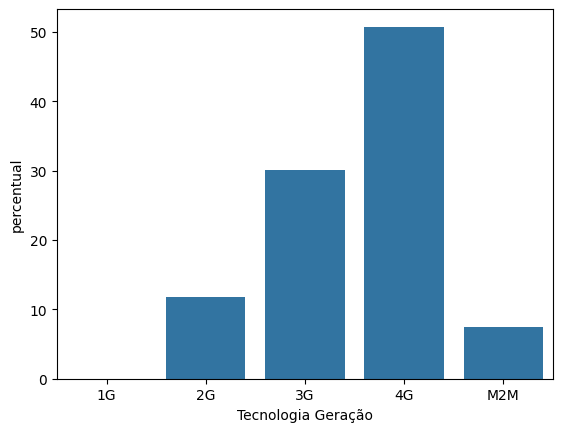

In [272]:
#visualizar em um gráfico de barra a porcentagem a partir da media de acessos por tecnologia geração
sns.barplot(data=df_2018_tec_ger, x='Tecnologia Geração', y='percentual')

### Tecnologia geração x Empresa

In [273]:
#criar um dataframe para visualizar a porcentagem 
tec_empresa_2018 = pd.DataFrame(df_2018_tec.groupby(['Empresa', 'Tecnologia Geração']).sum()['media_ano'])
tec_empresa_2018 = tec_empresa_2018.drop(index=[0]) 
tec_empresa_2018['percentual'] = round((tec_empresa_2018['media_ano'] / tec_empresa_2018.groupby('Empresa').sum()['media_ano']) * 100, 2)
tec_empresa_2018['ano'] = 2018
tec_empresa_2018

media_ano  percentual  \
Empresa                        Tecnologia Geração                            
ALGAR (CTBC TELECOM)           1G                         0.00        0.00   
                               2G                     33043.57        7.57   
                               3G                    337438.49       77.33   
                               4G                     61533.75       14.10   
                               M2M                     4340.67        0.99   
CLARO                          2G                   1915888.41        3.26   
                               3G                  23917213.49       40.75   
                               4G                  27246973.80       46.42   
                               M2M                  5616051.67        9.57   
DATORA                         2G                      2490.00        0.88   
                               3G                      3950.00        1.39   
                               M2M                   277284.58       97.73   
J. SAFRA TELECOMUNICACOES LTDA M2M                     1137.17      100.00   
NEXTEL                         3G                   1567470.68       50.91   
                               4G                   1511552.08       49.09   
OI                             2G                   6602859.48       17.11   
                               3G                  10818426.39       28.04   
                               4G                  19515805.43       50.58   
                               M2M                  1649955.52        4.28   
PORTO SEGURO                   2G                    115572.43       16.62   
                               M2M                   579781.65       83.38   
PREFEITURA DE LONDRINA/COPEL   1G                         0.00        0.00   
                               2G                       869.08        1.33   
                               3G                     63924.50       97.88   
                               4G                         0.00        0.00   
                               M2M                      516.00        0.79   
SURF TELECOM SA                2G                     52402.75       76.41   
                               4G                       118.55        0.17   
                               M2M                    16062.50       23.42   
TERAPAR TELECOMUNICAÇÕES LTDA  3G                         0.00         NaN   
                               M2M                        0.00         NaN   
TIM                            1G                         0.00        0.00   
                               2G                   8287164.50       14.57   
                               3G                  15123530.64       26.59   
                               4G                  31574514.75       55.51   
                               M2M                  1891482.06        3.33   
UNICEL                         2G                         0.00         NaN   
VIVO                           2G                  10618273.40       14.22   
                               3G                  18265236.37       24.47   
                               4G                  38535008.49       51.62   
                               M2M                  7236469.84        9.69   

                                                    ano  
Empresa                        Tecnologia Geração        
ALGAR (CTBC TELECOM)           1G                  2018  
                               2G                  2018  
                               3G                  2018  
                               4G                  2018  
                               M2M                 2018  
CLARO                          2G                  2018  
                               3G                  2018  
                               4G                  2018  
                               M2M                 2018  
DATORA                         2G                  2018  
  

In [274]:
#criar um dataframe apenas com as cinco maiores empresas
tec_empresa_2018_top5 = tec_empresa_2018.loc[top5_empresas_2018]
tec_empresa_2018_top5['ano'] = 2018
tec_empresa_2018_top5

media_ano  percentual   ano
Empresa Tecnologia Geração                               
VIVO    2G                  10618273.40       14.22  2018
        3G                  18265236.37       24.47  2018
        4G                  38535008.49       51.62  2018
        M2M                  7236469.84        9.69  2018
CLARO   2G                   1915888.41        3.26  2018
        3G                  23917213.49       40.75  2018
        4G                  27246973.80       46.42  2018
        M2M                  5616051.67        9.57  2018
TIM     1G                         0.00        0.00  2018
        2G                   8287164.50       14.57  2018
        3G                  15123530.64       26.59  2018
        4G                  31574514.75       55.51  2018
        M2M                  1891482.06        3.33  2018
OI      2G                   6602859.48       17.11  2018
        3G                  10818426.39       28.04  2018
        4G                  19515805.43       50.58  2018
        M2M                  1649955.52        4.28  2018
NEXTEL  3G                   1567470.68       50.91  2018
        4G                   1511552.08       49.09  2018

### Análise da presença de cada tecnologia geração por estado

In [275]:
#criar um dataframe agrupando UF e Tecnologia Geração para visualizar a porcentagem de cada uma das tecnologias de geração por estado - para isso basta adicionar a coluna porcentagem ao dataframe
df_2018_tec_uf = pd.DataFrame(df_2018_tec.groupby(['UF', 'Tecnologia Geração'])['media_ano'].sum())
df_2018_tec_uf['percentual'] = round(((df_2018_tec_uf['media_ano'] / df_2018_tec_uf.groupby('UF')['media_ano'].sum())), 4)
df_2018_tec_uf['ano'] = 2018
df_2018_tec_uf

media_ano  percentual   ano
UF Tecnologia Geração                               
AC 2G                    121316.00      0.1568  2018
   3G                    206467.34      0.2668  2018
   4G                    439085.25      0.5674  2018
   M2M                     6963.42      0.0090  2018
AL 1G                         0.00      0.0000  2018
...                            ...         ...   ...
SP M2M                 11237893.71      0.1797  2018
TO 2G                    249574.33      0.1526  2018
   3G                    569387.92      0.3482  2018
   4G                    805795.92      0.4928  2018
   M2M                    10468.84      0.0064  2018

[121 rows x 3 columns]